# [Airbnb Prices - 100]

Group Members:

Deniz Balta 26672

## Introduction
In this project, I'm trying to find what factors determine the prices of the Airbnb listings in New York City using the tecniques we learned in the CS210 class.

### Problem Definition

The end goal of this project to have better understanding of the prices of Airbnb listing in New York City and to guess the price of an Airbnb listing if I have certain information on it. I will achieve solving this with hypothesis testing, t-test and machine learning modelling.

### Utilized Datasets

The first dataset used can be found using this link: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

The second dataset used can ben found using this link: https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score

from os.path import join 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
fname = "AB_NYC_2019.csv"
df = pd.read_csv(join(path_prefix, fname))

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
filename = "NYPD_Arrest_Data_.csv"
ad = pd.read_csv(join(path_prefix, filename))

ad.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,211620954,03/31/2020,746.0,"PERJURY 3,ETC.",359.0,OFFENSES AGAINST PUBLIC ADMINI,PL 2104500,M,Q,113,0,18-24,M,ASIAN / PACIFIC ISLANDER,1046405,187113,40.680049,-73.775909
1,211628059,03/31/2020,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,B,49,0,45-64,M,WHITE HISPANIC,1027430,251105,40.855803,-73.843910
2,211633662,03/31/2020,113.0,"MENACING,UNCLASSIFIED",344.0,ASSAULT 3 & RELATED OFFENSES,PL 1201401,M,B,46,0,<18,F,BLACK HISPANIC,1010591,250447,40.854063,-73.904784
3,211634243,03/31/2020,117.0,RECKLESS ENDANGERMENT 1,126.0,MISCELLANEOUS PENAL LAW,PL 1202500,F,M,25,0,45-64,M,BLACK,1003297,231385,40.801762,-73.931204
4,211634096,03/31/2020,114.0,OBSTR BREATH/CIRCUL,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1211100,M,Q,108,0,25-44,M,BLACK HISPANIC,1008720,211017,40.745844,-73.911691


####Understanding and cleaning the datasets

This section is for seeing some aspects of the datasets, so that when it comes to data exploration and creating machine learning models, the data will be suitable to do so. 

#####The Airbnb Listings Dataset

In [ ]:
df.shape

(48895, 16)

In [ ]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

I am removing the columns with mostly NaN values like "last_review" and "reviews_per_month". I am also removing the columns "name" and "host_name" not because they have some NaN values but because the information on these columns isn't necessary. 

In [ ]:
df.drop([ "reviews_per_month", "name", "host_name", "last_review"], axis=1, inplace=True)
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


Now I will look at some detailed information about the columns in the dataset so that I can understand what are the most common values of them. 

In [ ]:
ng_count=df.neighbourhood_group.value_counts()
ng_count

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
n_count=df.neighbourhood.value_counts()
n_count.head(15)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
East Harlem           1117
Greenpoint            1115
Chelsea               1113
Lower East Side        911
Astoria                900
Name: neighbourhood, dtype: int64

In [ ]:
array=df.host_id.unique()
print("Number of unique host id's from 48895 different Airbnb listings is:", len(array))
h_count=df.host_id.value_counts()
top_hosts=h_count.head(10)
top_hosts

Number of unique host id's from 48895 different Airbnb listings is: 37457


219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [ ]:
r_count=df.room_type.value_counts()
r_count

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

#####The NYC Arrest Dataset


In [ ]:
ad.shape

(44824, 18)

In [ ]:
ad.dtypes

ARREST_KEY             int64
ARREST_DATE           object
PD_CD                float64
PD_DESC               object
KY_CD                float64
OFNS_DESC             object
LAW_CODE              object
LAW_CAT_CD            object
ARREST_BORO           object
ARREST_PRECINCT        int64
JURISDICTION_CODE      int64
AGE_GROUP             object
PERP_SEX              object
PERP_RACE             object
X_COORD_CD             int64
Y_COORD_CD             int64
Latitude             float64
Longitude            float64
dtype: object

In [ ]:
ad.isnull().sum()

ARREST_KEY             0
ARREST_DATE            0
PD_CD                  2
PD_DESC               34
KY_CD                 34
OFNS_DESC             34
LAW_CODE               0
LAW_CAT_CD           395
ARREST_BORO            0
ARREST_PRECINCT        0
JURISDICTION_CODE      0
AGE_GROUP              0
PERP_SEX               0
PERP_RACE              0
X_COORD_CD             0
Y_COORD_CD             0
Latitude               0
Longitude              0
dtype: int64

I am removing the columns "LAW_CAT_CD" which represents the type of the offense and "PERP_SEX" which represents the sex of the perpetrator since both are not related information for the problem I'm trying to solve.

I'm also changing the values of the "ARREST_BRO" which represents the neighbourhood of the arrest to match the values of the first dataset. 

In [ ]:
#dropping the columns "LAW_CAT_CD" and "PERP_SEX
ad.drop(["LAW_CAT_CD", "PERP_SEX"], axis=1, inplace=True)

#replacing the values of this column to match the other dataset
ad=ad.replace(to_replace="Q", value="Queens")
ad=ad.replace(to_replace="B", value="Bronx")
ad=ad.replace(to_replace="M", value="Manhattan")
ad=ad.replace(to_replace="K", value="Brooklyn")
ad=ad.replace(to_replace="S", value="Staten Island")
ad.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,211620954,03/31/2020,746.0,"PERJURY 3,ETC.",359.0,OFFENSES AGAINST PUBLIC ADMINI,PL 2104500,Queens,113,0,18-24,ASIAN / PACIFIC ISLANDER,1046405,187113,40.680049,-73.775909
1,211628059,03/31/2020,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,Bronx,49,0,45-64,WHITE HISPANIC,1027430,251105,40.855803,-73.843910
2,211633662,03/31/2020,113.0,"MENACING,UNCLASSIFIED",344.0,ASSAULT 3 & RELATED OFFENSES,PL 1201401,Bronx,46,0,<18,BLACK HISPANIC,1010591,250447,40.854063,-73.904784
3,211634243,03/31/2020,117.0,RECKLESS ENDANGERMENT 1,126.0,MISCELLANEOUS PENAL LAW,PL 1202500,Manhattan,25,0,45-64,BLACK,1003297,231385,40.801762,-73.931204
4,211634096,03/31/2020,114.0,OBSTR BREATH/CIRCUL,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1211100,Queens,108,0,25-44,BLACK HISPANIC,1008720,211017,40.745844,-73.911691


Most related column of this dataset to my problem is "ARREST_BORO", so I'm looking at the count of the values in this column.

In [ ]:
nb_count=ad.ARREST_BORO.value_counts()
nb_count

Brooklyn         12093
Manhattan        11418
Bronx            10060
Queens            9304
Staten Island     1949
Name: ARREST_BORO, dtype: int64

## Data Exploration

### Visualizing the data

In this section, I am looking at the relationships between different variables from the same dataset or across the two datasets and visualizing them to have better understanding of the data.

Below chart is the statistics of the price values according to each neighbourhood.

In [ ]:
#creating another dataframe to store information
#column names of the new dataframe are the neighbourhoods to see the prices clearly
index=range(0, len(df))
df_n=pd.DataFrame(index=index)

#storing the price information for each column of the new dataset(neighbourhood)
n1=df.loc[df["neighbourhood_group"]=="Brooklyn"]
price_n1=n1["price"]
df_n["brooklyn_prices"]=price_n1

n2=df.loc[df["neighbourhood_group"]=="Manhattan"]
price_n2=n2["price"]
df_n["manhattan_prices"]=price_n2

n3=df.loc[df["neighbourhood_group"]=="Queens"]
price_n3=n3["price"]
df_n["queens_prices"]=price_n3

n4=df.loc[df["neighbourhood_group"]=="Bronx"]
price_n4=n4["price"]
df_n["bronx_prices"]=price_n4

n5=df.loc[df["neighbourhood_group"]=="Staten Island"]
price_n5=n5["price"]
df_n["staten_island_prices"]=price_n5


df_n.describe()

,brooklyn_prices,manhattan_prices,queens_prices,bronx_prices,staten_island_prices
count,20104.000000,21661.000000,5666.000000,1091.000000,373.000000
mean,124.383207,196.875814,99.517649,87.496792,114.812332
std,186.873538,291.383183,167.102155,106.709349,277.620403
min,0.000000,0.000000,10.000000,0.000000,13.000000
25%,60.000000,95.000000,50.000000,45.000000,50.000000
50%,90.000000,150.000000,75.000000,65.000000,75.000000
75%,150.000000,220.000000,110.000000,99.000000,110.000000
max,10000.000000,10000.000000,10000.000000,2500.000000,5000.000000


Below chart is the statistics of the price values according to each neighbourhood on a color map to help understand better.

Ratio of longitude of to latitude is: 1.2859147772642556


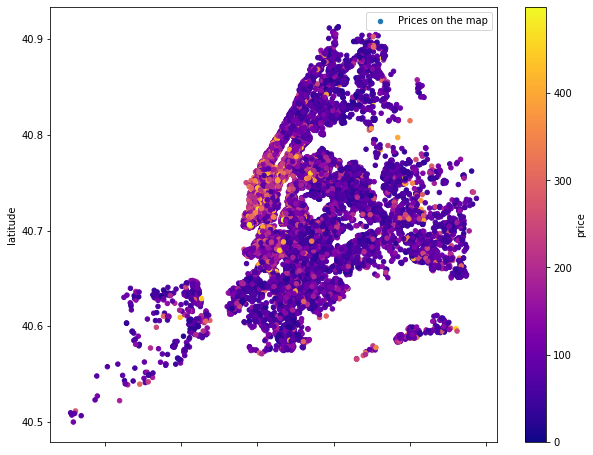

In [ ]:
#finding the ration between longitude and latitude to decide on the size of the figure
max_long=df["longitude"].max()
min_long=df["longitude"].min()

max_lat=df["latitude"].max()
min_lat=df["latitude"].min()

ratio=(max_long-min_long)/(max_lat-min_lat)
print("Ratio of longitude of to latitude is:", ratio)

#plotting the price values on the color map
#plotting the price values less than 500 to make it much less messy
prcs=df[df.price<500]

grph1=prcs.plot(kind='scatter', x='longitude', y='latitude', label='Prices on the map', c='price',
                  cmap=plt.get_cmap('plasma'), colorbar=True, alpha=1, figsize=(10,8))
grph1.legend()

After looking at the price values of each neighbourhood, I want to know the number of the each room type in the neighbourhoods.

Text(0.5, 0.98, 'Room types according to boroughs of New York City')

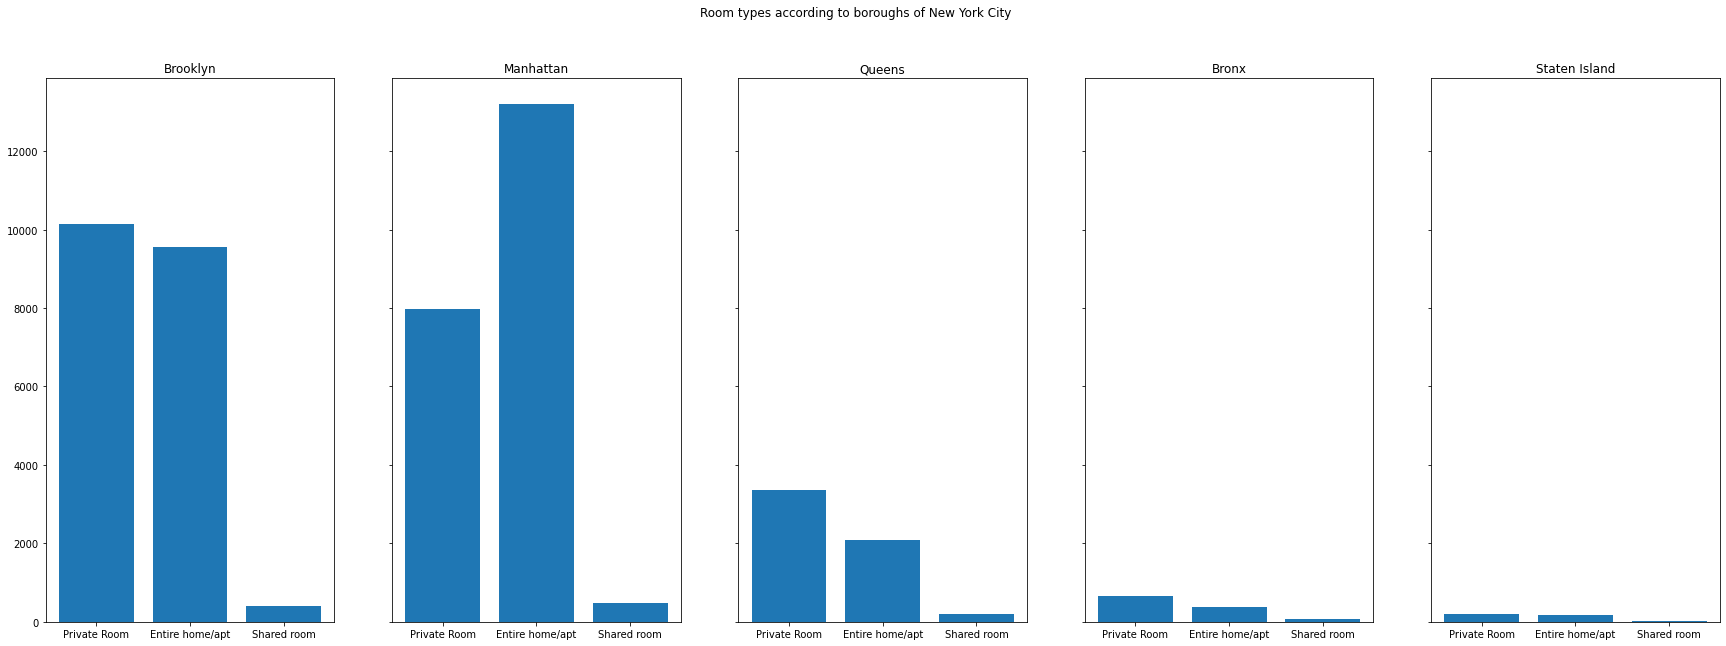

In [ ]:
#for each neighbourhood, extracting the room type information and putting to a list 
n1=df.loc[df["neighbourhood_group"]=="Brooklyn"]
rtype=n1["room_type"]
brokl_rtype=rtype.value_counts()
y_val1=[brokl_rtype["Private room"], brokl_rtype["Entire home/apt"], brokl_rtype["Shared room"]]

n2=df.loc[df["neighbourhood_group"]=="Manhattan"]
rtype=n2["room_type"]
man_rtype=rtype.value_counts()
y_val2=[man_rtype["Private room"], man_rtype["Entire home/apt"], man_rtype["Shared room"]]

n3=df.loc[df["neighbourhood_group"]=="Queens"]
rtype=n3["room_type"]
que_rtype=rtype.value_counts()
y_val3=[que_rtype["Private room"], que_rtype["Entire home/apt"], que_rtype["Shared room"]]

n4=df.loc[df["neighbourhood_group"]=="Bronx"]
rtype=n4["room_type"]
brx_rtype=rtype.value_counts()
y_val4=[brx_rtype["Private room"], brx_rtype["Entire home/apt"], brx_rtype["Shared room"]]

n5=df.loc[df["neighbourhood_group"]=="Staten Island"]
rtype=n5["room_type"]
si_rtype=rtype.value_counts()
y_val5=[si_rtype["Private room"], si_rtype["Entire home/apt"], si_rtype["Shared room"]]

x_va=["Private Room", "Entire home/apt", "Shared room"]


#plotting the lists that are formed above in the same figure as subplots
fig, axs = plt.subplots(1, 5, figsize=(30, 10), sharey=True)

axs[0].bar(x_va, y_val1)
axs[0].set_title("Brooklyn")
axs[1].bar(x_va, y_val2)
axs[1].set_title("Manhattan")
axs[2].bar(x_va, y_val3)
axs[2].set_title("Queens")
axs[3].bar(x_va, y_val4)
axs[3].set_title("Bronx")
axs[4].bar(x_va, y_val5)
axs[4].set_title("Staten Island")
fig.suptitle("Room types according to boroughs of New York City")

Afterwards, I also want to know the statistics of the relationship between the prices and the room types.

In [ ]:
#creating a new dataframe to see the prices clearly
index=range(0, len(df))
df_r=pd.DataFrame(index=index)

#storing the price info according to the room type
r1=df.loc[df["room_type"]=="Private room"]
price_r1=r1["price"]
df_r["private_room_prices"]=price_r1

r2=df.loc[df["room_type"]=="Entire home/apt"]
price_r2=r2["price"]
df_r["entire_home_prices"]=price_r2

r3=df.loc[df["room_type"]=="Shared room"]
price_r3=r3["price"]
df_r["shared_room_prices"]=price_r3

#print(df_r)
df_r.describe()

,private_room_prices,entire_home_prices,shared_room_prices
count,22326.000000,25409.000000,1160.000000
mean,89.780973,211.794246,70.127586
std,160.205262,284.041611,101.725252
min,0.000000,0.000000,0.000000
25%,50.000000,120.000000,33.000000
50%,70.000000,160.000000,45.000000
75%,95.000000,229.000000,75.000000
max,10000.000000,10000.000000,1800.000000


And finally, I want to see the prices in each neighbourhoods next to the arrest data from the second dataset. 

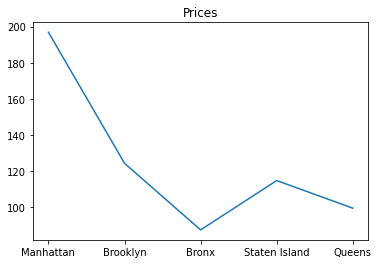

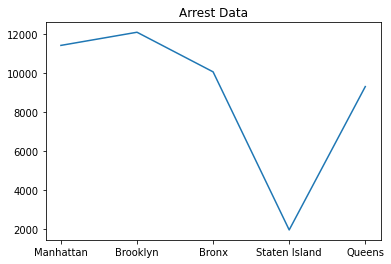

In [ ]:
#making lists to compare arrest and neighbourhood price
x_values=["Manhattan", "Brooklyn", "Bronx", "Staten Island","Queens" ]
y_vals= [df_n["manhattan_prices"].mean(),df_n["brooklyn_prices"].mean(), df_n["bronx_prices"].mean(), df_n["staten_island_prices"].mean(), df_n["queens_prices"].mean()]
oty_vals=[((ad['ARREST_BORO'] == "Manhattan").sum()),(ad['ARREST_BORO'] == "Brooklyn").sum(),(ad['ARREST_BORO'] == "Bronx").sum(),(ad['ARREST_BORO'] == "Staten Island").sum(), (ad['ARREST_BORO'] == "Queens").sum()]

#plotting the graphs
plt.title("Prices")
plt.plot(x_values, y_vals)
plt.show()

plt.title("Arrest Data")
plt.plot(x_values, oty_vals)
plt.show()

###Hypothesis Testing

After visualizing the data and looking at the relationships between different variables, I'm comfortable to form a hypothesis to test. 

After observing the datasets, I realized that the first dataset has too many outliers. However, I want to prove my observation by making a graph and see it from there. 

Text(0.5, 1.0, 'availability_365')

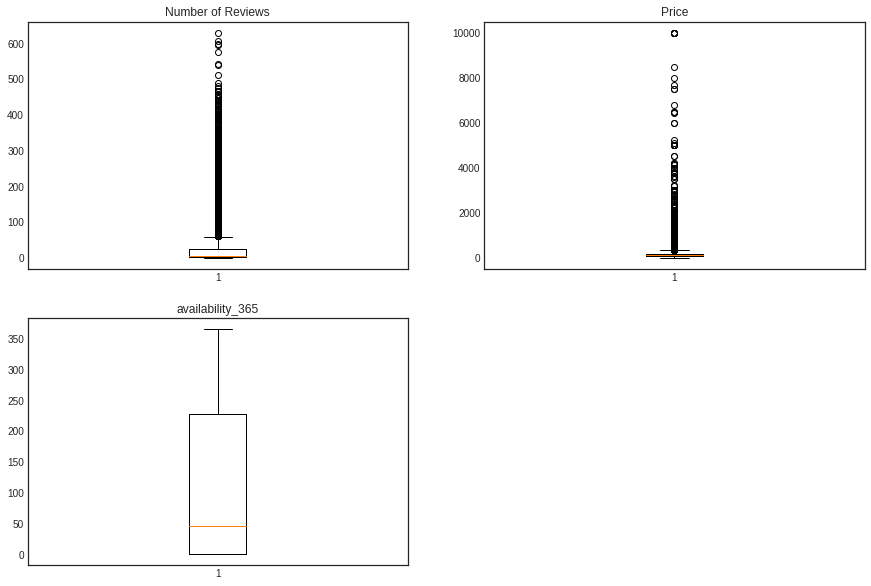

In [ ]:
#plotting some of the info to see outliers

#initiating the graphs
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
#plotting number of reviews
ax=plt.subplot(221)
plt.boxplot(df['number_of_reviews'])
ax.set_title('Number of Reviews')
#plotting price
ax=plt.subplot(222)
plt.boxplot(df['price'])
ax.set_title('Price')
#plotting availability
ax=plt.subplot(223)
plt.boxplot(df['availability_365'])
ax.set_title('availability_365')

As seen on the graph, there are too many outliers of the data, so I will get rid of this outliers using the IQR technique so that the hypothesis testing can be more accurate.

In [ ]:
#finding IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
#removing outliers
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)
df_out.head()

(28363, 12)


,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
10,5295,7702,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,1,6
18,7726,20950,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,1,21


####Hypothesis 1
Null hypothesis: Different neighbourhoods have no effect on the price of the Airbnb listing.

However, to test this hypothesis, I have to change the neighbourhood values to integer values. I am assigning the integer values of the neighbourhood according to the mean of prices I found earlier. So if the avarage price of the neighbourhood is higher, the integer value I am giving will also be higher. 

In [ ]:
#changing values 
df=df.replace(to_replace="Brooklyn", value=4)
df=df.replace(to_replace="Manhattan", value=5)
df=df.replace(to_replace="Queens", value=3)
df=df.replace(to_replace="Staten Island", value=2)
df=df.replace(to_replace="Bronx", value=1)
#calculating the pearson correlation
#first value is correlation second is the p-value
stats.pearsonr(df["price"], df['neighbourhood_group'])

(0.14945464766098396, 3.511890481674288e-242)

As the p-value is lower than the signifance level, the test is significant. From the correlation coefficient, we can conclude that the relationship is positively correlated which means we can reject the null hypothesis. 

####Hypothesis 2

Null hypothesis: Room type has no effect on the price of the listing. 

Since I need integer values for the room type column of the dataset, I will change the values according to the prices I found earlier. So if the avarage price is higher, the integer values I am giving will alsı be higher. 



In [ ]:
#changing values
df=df.replace(to_replace="Private room", value=3)
df=df.replace(to_replace="Entire home/apt", value=2)
df=df.replace(to_replace="Shared room", value=1)
#calculating the pearson correlation
#first value is correlation second is the p-value
stats.pearsonr(df["price"], df['room_type'])

(-0.20602706991491, 0.0)

Since the p-value is greater than the signifigance level, we have to conclude that the test has no signifigance.

####Hypothesis 3

Null hypothesis: Crime in the neighbourhoods has no effect on the prices.

I will use t-test for this hypothesis and I will look at the Brooklyn and Staten Island prices since Brooklyn has the biggest arrest rate and Staten Island has the lowest.

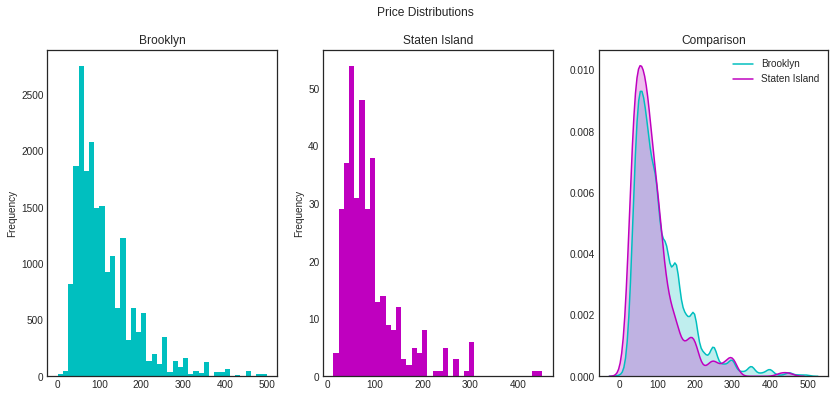

In [ ]:
#initiating graphs
fig, ax = plt.subplots(1, 3, figsize=(14,6)) 

#creating a new dataframe to store information
#brooklyn info
df_n_cut_b=df_n[df_n.brooklyn_prices<500]
brooklyn_p=df_n_cut_b["brooklyn_prices"]
#staten island info
df_n_cut_s=df_n[df_n.staten_island_prices<500]
staten_p=df_n_cut_s["staten_island_prices"]

#plotting the info on to the graphs
brooklyn_p.plot(kind="hist", ax=ax[0], bins=40, label="Brooklyn", color="c")
ax[0].set_title("Brooklyn")

staten_p.plot(kind="hist", ax=ax[1], bins=40, label="Staten Island", color="m")
ax[1].set_title("Staten Island")

#plotting the comparison
sns.kdeplot(brooklyn_p, shade=True, label="Brooklyn", ax=ax[2], color="c")
sns.kdeplot(staten_p, shade=True, label="Staten Island", ax=ax[2], color="m")
ax[2].set_title("Comparison")

plt.suptitle("Price Distributions")
plt.show()


In [ ]:
#t-test
#first value is correlation second is the p-value
stats.ttest_ind(brooklyn_p, staten_p, equal_var=False)

Ttest_indResult(statistic=6.152172208453047, pvalue=1.9197258803702475e-09)

P-value of this test less than the signifigance level, so our test is significant so we can reject the null hypothesis. 

## Machine Learning Models


### Implementation

Before starting any machine learning models, I should change the values of room type and neighbourhood columns in the dataset since I need integer values for those. This time I will give the integer values of the neighbourhood according to the arrest data while giving the integer values of the room types according to the price. Also I'm dropping the neighbourhood column as the values of this column are string and I need to change it into integer however since I don't need the information I will just be dropping the column instead.

In [ ]:
#dropping out neighbouthood 
df_out.drop([ "neighbourhood"], axis=1, inplace=True)

#changing values
df_out=df_out.replace(to_replace="Private room", value=3)
df_out=df_out.replace(to_replace="Entire home/apt", value=2)
df_out=df_out.replace(to_replace="Shared room", value=1)

#changing values
df_out=df_out.replace(to_replace="Brooklyn", value=5)
df_out=df_out.replace(to_replace="Manhattan", value=4)
df_out=df_out.replace(to_replace="Queens", value=2)
df_out=df_out.replace(to_replace="Staten Island", value=1)
df_out=df_out.replace(to_replace="Bronx", value=3)
df_out

,id,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
1,2595,2845,4,40.75362,-73.98377,2,225,1,45,2,355
2,3647,4632,4,40.80902,-73.94190,3,150,3,0,1,365
4,5022,7192,4,40.79851,-73.94399,2,80,10,9,1,0
10,5295,7702,4,40.80316,-73.96545,2,135,5,53,1,6
18,7726,20950,5,40.67592,-73.94694,2,99,3,53,1,21
...,...,...,...,...,...,...,...,...,...,...,...
48887,36483152,208514239,5,40.71232,-73.94220,2,170,1,0,3,365
48890,36484665,8232441,5,40.67853,-73.94995,3,70,2,0,2,9
48891,36485057,6570630,5,40.70184,-73.93317,3,40,4,0,2,36
48892,36485431,23492952,4,40.81475,-73.94867,2,115,10,0,1,27


I will also standardize the data before doing anything so the result will be more accurate.




In [ ]:
#calculating mean and standard deviation
mean = df_out['price'].mean()
std = df_out['price'].std()

#standardization
df_out['standardized'] = (df_out['price'] - mean) / std
df_out.head()

,id,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,standardized
1,2595,2845,4,40.75362,-73.98377,2,225,1,45,2,355,1.546159
2,3647,4632,4,40.80902,-73.94190,3,150,3,0,1,365,0.422125
4,5022,7192,4,40.79851,-73.94399,2,80,10,9,1,0,-0.626973
10,5295,7702,4,40.80316,-73.96545,2,135,5,53,1,6,0.197319
18,7726,20950,5,40.67592,-73.94694,2,99,3,53,1,21,-0.342218


####kNN
In this section I will use model with the kNN. 

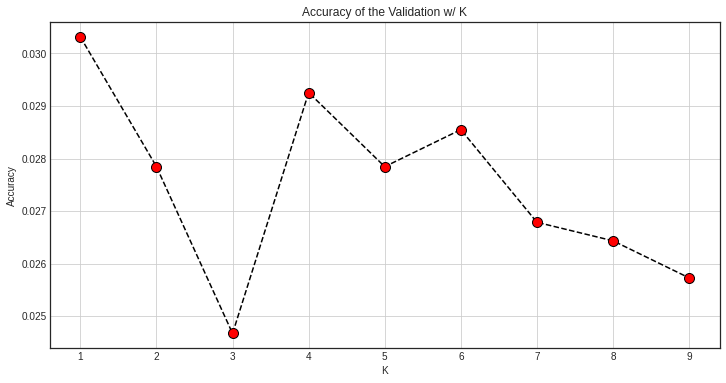

In [ ]:
X = df_out.drop("price", axis=1)
y = df_out["price"]
train_x, val_x, train_y, val_y = train_test_split(X, y, random_state=1)


# 80% training,20% testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=1)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=1)


K_range = np.arange(1, 10)
accuracy_list = []

#creating new model with K, fitting, predicting 
for k in K_range:
  knn = KNeighborsClassifier(k, metric="euclidean")
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_val)
  #accuracy
  accuracy = accuracy_score(y_val, y_pred)
  accuracy_list.append(accuracy)

#plotting the accuracy value 
plt.figure(figsize=(12, 6))  
plt.plot(K_range, accuracy_list, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Validation w/ K')  
plt.xlabel('K')  
plt.ylabel('Accuracy')
plt.xticks(K_range)
plt.grid()
plt.show()

As seen on the graph, the accuracy is the highest when the k value is 1, so for the accuracy score I will take k as 1.

In [ ]:
knn = KNeighborsClassifier(1, metric="euclidean")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.03067700987306065

####Decision Tree

In [ ]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred2 = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred2))

Accuracy: 0.9954160789844851


The accuracy of the decision tree is suspiciously high, so I should do a cross-validation.

In [ ]:
accuracies = cross_val_score(model, X_train, y_train, cv=10)
accuracies
print("Accuracy:", accuracies.mean(), "(+/-)", accuracies.std()*2 )

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy: 0.9970030850594978 (+/-) 0.002115469369766417


The accuracy didn't change much with the cross validation, it's still suspiciously high. 

### Results & Discussion

The results of my two models are very different. One is very far away from 1 and the other is close to 1. However, I'm more willing to trust the kNN model result since 0.9976 is a very high accuracy score. One advantage of using kNN model is that new data is added to the model more easily than the decision tree however, it works less efficiently than decision trees with large data. Since this isn't a very large dataset the kNN model worked just fine. 

## Conclusion



I don't think my solutions are applicable since the results of my two machine learning models are very different from each other. I think that dropping some columns to do my calculations might be the reason that the kNN accuracy score is very low. I also think that the kNN result is low because I gave the values of some columns myself.However, both of these reasons are not expailing the difference between the results of the two machine learning models. With these different results, most of them confirmed the hypotheses of the their own tests which I'm reluctantly glad about.

